# **Australia Car Market  Data Analysis and Model Training**

## By: Adeleke Adekola Emmanuel

### ABOUT DATASET 📚
>Description

This dataset provides detailed information about the car market in Australia, including attributes such as car code, car name, car price, car brand, car model year, gearbox type, design type, fuel type, car condition, mileage, engine capacity, car color, and seating capacity. It is a rich source of data that helps explore trends and dynamics in the Australian car market, supporting analysis and decision-making in the automotive industry.

>Column Descriptions;

ID: Car Code
Name: Car Name
Price: Car Price
Brand: Car Brand
Model: Car Model Year
Variant: Car Variant
Series: Car Series
Year: Year of Manufacture
Gearbox: Gearbox Type
Type: Body Design
Fuel: Fuel Type
Status: Car Condition
Kilometers: Mileage
CC: Engine Capacity
Color: Car Color
Seating Capacity: Seating Capacity

>Tools;

Jupyter Notebook, colab, Gemini

### DATA SOURCE: Kaggle
>### Project Purpose: 

To analyze the trend in the car market in Australia, and also be able to get a predicted price based on the customer's car specification.

### Table of Contents
<ul
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Prepocessing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Split Data">Split Data</a></li>
<li><a href="#Baseline">Baseline</a></li>
<li><a href="#Build Model">Build Model</a></li>
<li><a href="#iterate">Iteration</a></li>
<li><a href="#Evaluate">Evaluation</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='wrangling'></a>
## Data Wrangling and Prepocessing

In [2]:
#Import the dataset
df= pd.read_csv("cars_info.csv")
df.head(2)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7


In [3]:
#Check for number of rows and columns 
print(df.shape)

(17048, 16)


In [4]:
#Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [5]:
#Check for missing values
df.isna().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

In [6]:
# Check for Duplicates
df.duplicated().sum()

0

In [7]:
# Check for Outliers
df.describe()

,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1767a73be80>,
 'caps': [<matplotlib.lines.Line2D at 0x1767a754580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1767a73bb20>],
 'medians': [<matplotlib.lines.Line2D at 0x1767a754c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1767a754fa0>],
 'means': []}

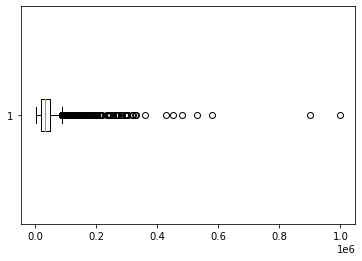

In [8]:
#Check for outlier using boxplot
plt.boxplot(df['Price'], vert=False)

In [9]:
#Check for Maximum Price
df['Price'].max()

999000

In [10]:
df1 = df[df['Price'] >= 999000]

In [11]:
df1

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
4285,12757389,2016 Porsche 911 R 991 MY16,999000,Porsche,911,R,991 MY16,2016,3409,Coupe,Manual,Premium Unleaded Petrol,Used,3996,Black,2


In [12]:
df[df['Seating Capacity'] >= 14].head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
740,12700685,2016 Toyota Hiace Commuter KDH223R MY15,52990,Toyota,Hiace,Commuter,KDH223R MY15,2016,86055,Bus,Automatic,Diesel,Used,2982,White,14
1054,12706701,2013 Toyota Hiace Commuter KDH223R MY12 Upgrade,49913,Toyota,Hiace,Commuter,KDH223R MY12 Upgrade,2013,70085,Bus,Automatic,Diesel,Used,2982,White,14
1288,12711018,2012 Toyota Hiace Commuter KDH223R MY11 Upgrade,46913,Toyota,Hiace,Commuter,KDH223R MY11 Upgrade,2012,43937,Bus,Automatic,Diesel,Used,2982,White,14
1841,12721510,2014 Toyota Hiace Commuter KDH223R MY14,49800,Toyota,Hiace,Commuter,KDH223R MY14,2014,115829,Bus,Automatic,Diesel,Used,2982,White,14
2381,12729255,2004 Toyota Hiace Commuter LH184R,9990,Toyota,Hiace,Commuter,LH184R,2004,181933,Bus,Manual,Diesel,Used,2986,White,14


In [13]:
#Make a copy of dataset before cleaning
car = df.copy()

In [14]:
#subset for outliers
low, high = car["Price"].quantile([0.1,0.9])
car_price = car["Price"].between(low,high)
car = car[car_price]
print(car['Price'].max())
print(car.head(2))

67772
         ID                                        Name  Price          Brand  \
3  12346971  2010 Mercedes-Benz E250 CDI Avantgarde 207  34990  Mercedes-Benz   
4  12363884                2016 Holden Cruze CD JH MY16  15990         Holden   

   Model         Variant   Series  Year  Kilometers         Type    Gearbox  \
3   E250  CDI Avantgarde      207  2010      120579    Cabriolet  Automatic   
4  Cruze              CD  JH MY16  2016       72506  Sportswagon  Automatic   

              Fuel Status    CC  Color  Seating Capacity  
3           Diesel   Used  2143  Black                 4  
4  Unleaded Petrol   Used  1796  White                 5  


<a id='eda'></a>
# Exploratory Data Analysis

> EDA Questions
1. Car Brand with the most Variants
2. Car brand with most models
3. Car Model with the strongest engine capacity
4. Most Expensive car brand
5. Does seating capacity influence price
6. Does engine capacity influence price
7. Are new models more expensive
8. Most available car brand by year
9. Car color variation
10. Does Status, model, and car series influence price
11. Top 5 Car Type Distribution
12. Car Fuel Distribution
13. Car Gearbox Distribution
14. Car Status Distribution









<AxesSubplot:>

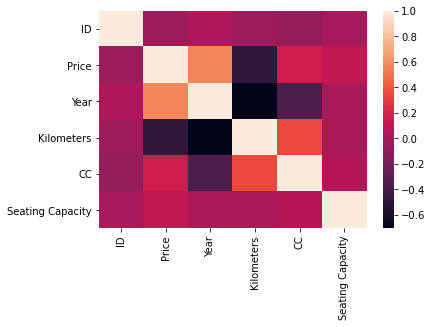

In [15]:
corr = car.select_dtypes("number").corr()
sns.heatmap(corr)

### 1. Car Brand with the most Variants

In [16]:
car_brand_variant =car.groupby('Brand')['Variant'].nunique().sort_values(ascending=False).head(10)
car_brand_variant

Brand
Volkswagen    177
Toyota        165
Mazda         132
Ford          131
Holden        125
Hyundai       120
Mitsubishi    114
Audi          112
Nissan         93
Subaru         91
Name: Variant, dtype: int64

<AxesSubplot:xlabel='Brand'>

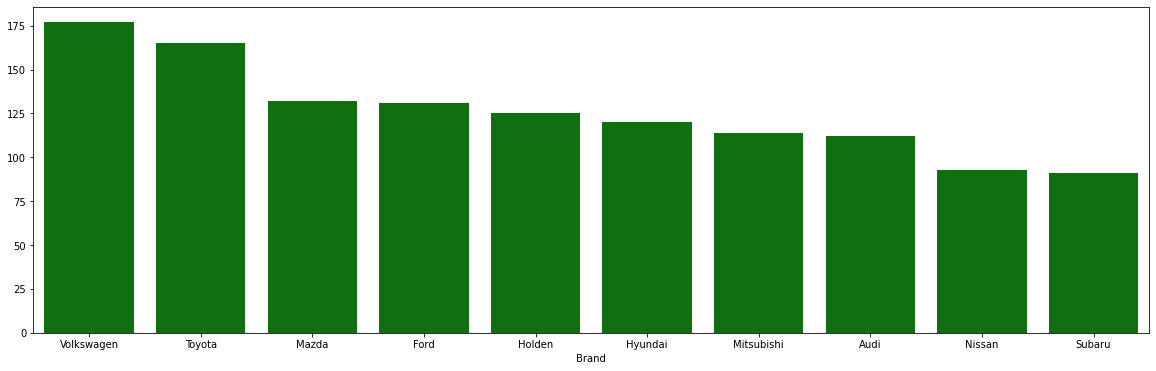

In [17]:
plt.figure(figsize=(20,6))
sns.barplot(x=car_brand_variant.index, y=car_brand_variant.values, color='green')

#### The car brand with the highest variants is Volkswagen, with a total number of 177 variants

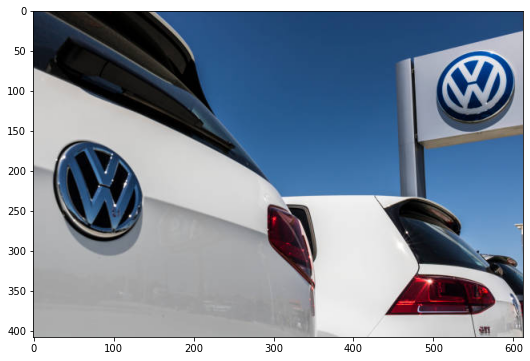

In [18]:
# Load the image
image = plt.imread('Volkswagen 1.jpg')
plt.figure(figsize=(30,6))
plt.imshow(image)
plt.show()

### 2. Car brand with most models

In [19]:
car_brand_model = car.groupby('Brand')['Model'].nunique().sort_values(ascending=False).head(10)
car_brand_model

Brand
Mercedes-Benz    61
BMW              44
Lexus            27
Toyota           25
Holden           20
Audi             19
Volkswagen       19
Hyundai          18
Ford             17
Kia              15
Name: Model, dtype: int64

<AxesSubplot:xlabel='Brand'>

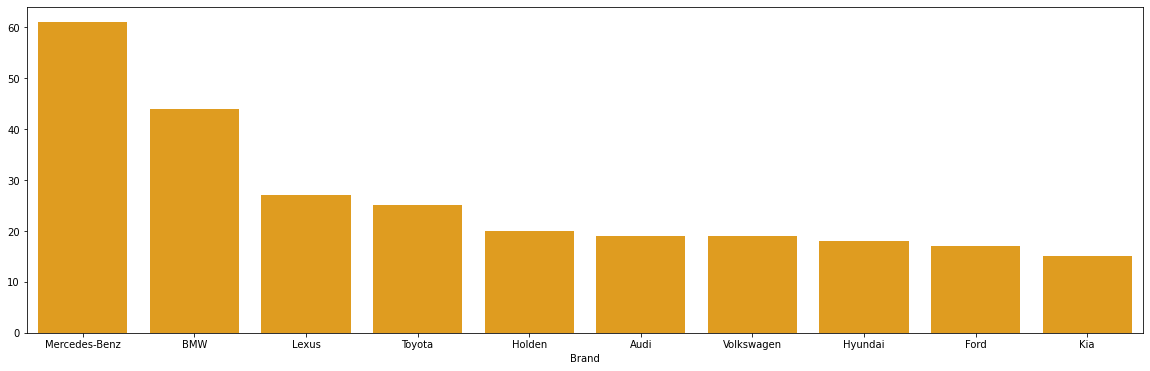

In [20]:
plt.figure(figsize=(20,6))
sns.barplot(x=car_brand_model.index, y=car_brand_model.values, color='orange')

#### Car brand with the most models is Mercedes-Benz with a total of 61 models

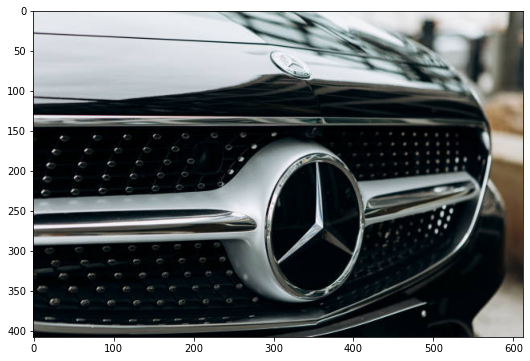

In [21]:
image1 = plt.imread('Mercedes-Benz1.jpg')
plt.figure(figsize=(30,6))
plt.imshow(image1)
plt.show()

### 3. Car Model with the strongest engine capacity

In [22]:
car_cc = car['CC'] == car['CC'].max()
car[car_cc]

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
440,12694043,2015 Jeep Grand Cherokee SRT 8 (4X4) WK MY15,57777,Jeep,Grand Cherokee,SRT 8 (4X4),WK MY15,2015,114344,Wagon,Automatic,Premium Unleaded Petrol,Used,6424,Black,5
602,12696788,2013 Jeep Grand Cherokee SRT 8 Vapour WK MY13,48000,Jeep,Grand Cherokee,SRT 8 Vapour,WK MY13,2013,112436,Wagon,Automatic,Premium Unleaded Petrol,Used,6424,Black,5
2892,12738048,2015 Jeep Grand Cherokee SRT 8 (4X4) WK MY15,59999,Jeep,Grand Cherokee,SRT 8 (4X4),WK MY15,2015,107898,Wagon,Automatic,Premium Unleaded Petrol,Used,6424,Black,5
13652,12835690,2015 Jeep Grand Cherokee SRT 8 (4X4) WK MY15,66880,Jeep,Grand Cherokee,SRT 8 (4X4),WK MY15,2015,74366,Wagon,Automatic,Premium Unleaded Petrol,Used,6424,White,5
14874,12841279,2014 Jeep Grand Cherokee SRT 8 (4X4) WK MY14,50000,Jeep,Grand Cherokee,SRT 8 (4X4),WK MY14,2014,114000,Wagon,Automatic,Premium Unleaded Petrol,Used,6424,Blue,5


#### Car brand with the strongest engine capacity is Jeep: CC=6424

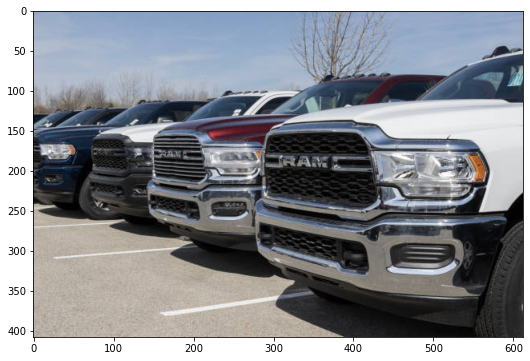

In [23]:
image2 = plt.imread('Jeep Cherokee1.jpg')
plt.figure(figsize=(30,6))
plt.imshow(image2)
plt.show()

### 4. Most Expensive car brand

In [24]:
car_max_price = car['Price'] == car['Price'].max()
car[car_max_price]

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
9758,12811931,2021 BMW X1 Xdrive 25I M Sport F48,67772,BMW,X1,Xdrive 25I M Sport,F48,2021,11300,Wagon,Automatic,Premium Unleaded Petrol,Used,1998,White,5


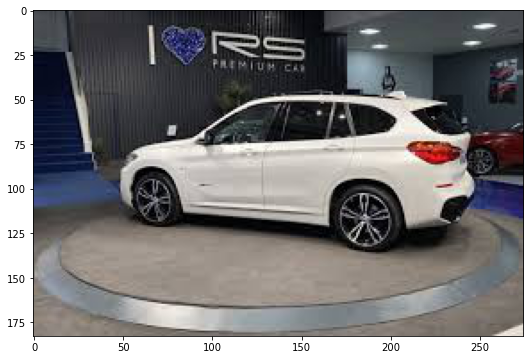

In [25]:
image5 = plt.imread('BMW_Xi1.jfif')
plt.figure(figsize=(30,6))
plt.imshow(image5)
plt.show()

#### Most expensive car brand is BMW, model: X1, Price: $67,772

### 5. Does seating capacity influence price

In [26]:
price_seat_correlation = car["Seating Capacity"].corr(car['Price'])
print(price_seat_correlation)

0.11188794026384805


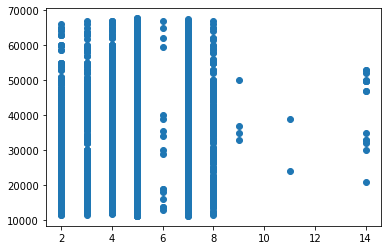

In [27]:
plt.scatter(car["Seating Capacity"], car['Price'])

#### There is a very low correlation between seating capacity and price of car.

### 6. Does engine capacity influence price

In [28]:
price_CC_correlation = car["CC"].corr(car['Price'])
print(price_CC_correlation)

0.1598488315593773


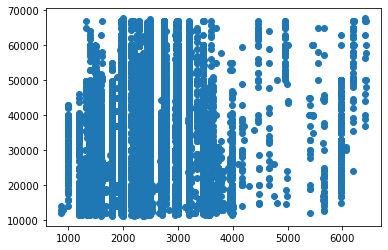

In [29]:
plt.scatter(car["CC"], car['Price'])

#### There is a very low correlation between engine capacity and price of car.

### 7. Are new models more expensive?

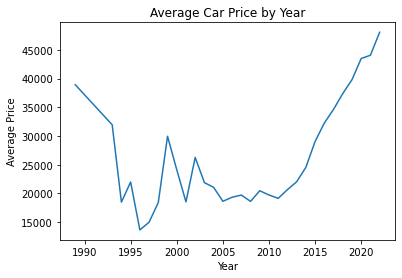

In [30]:
avg_price_by_year = car.groupby('Year')['Price'].mean()
plt.plot(avg_price_by_year.index, avg_price_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Car Price by Year')
plt.show()

#### Yes, new models are more expensive

### 8. Most available car brand by year count

In [31]:
car_counts = car.groupby(['Year', 'Brand']).size().reset_index(name='Count')
# Find the most available brand for each year
most_available = car_counts.groupby('Year').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)
print(most_available['Brand'].value_counts()) # To count brand with highest figure over the years

Toyota    23
Holden     4
Ford       2
Nissan     1
Mazda      1
Name: Brand, dtype: int64


#### Most available car brand over the years is Toyota

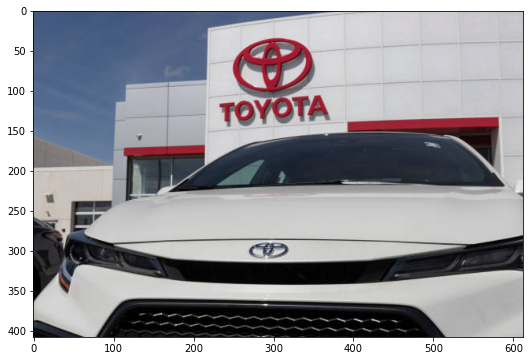

In [32]:
image4 = plt.imread('Toyota1.jpg')
plt.figure(figsize=(30,6))
plt.imshow(image4)
plt.show()

### 9. Car color variation

In [33]:
# Group by color and count the cars
color_counts = car['Color'].value_counts().reset_index(name='Count')

# Sort by count in descending order
color_counts = color_counts.sort_values(by='Count', ascending=False)
print(color_counts)

       index  Count
0      White   5246
1       Grey   1939
2     Silver   1912
3      Black   1447
4       Blue   1214
..       ...    ...
97    Frozen      1
96   Frosted      1
94    SIlver      1
93     Baige      1
189   Fabric      1

[190 rows x 2 columns]


#### Cars are mostly painted in White, followed by Grey and silver.

plt.figure(figsize=(20,6))
plt.bar(color_counts['Color'].head(10), color_counts['Count'].head(10), color='blue')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Top 10 Car Colors')
plt.show()

### 10. Does Status, model, and car series influence price

In [34]:
# One-way ANOVA for Status
model_anova = ols('Price ~ Status', data=car).fit()
anova_table = sm.stats.anova_lm(model_anova)
print(anova_table)

# Multiple linear regression for Model and Series
model_regression = ols('Price ~ Model + Series', data=car).fit()
print(model_regression.summary())

               df        sum_sq       mean_sq           F         PR(>F)
Status        2.0  1.192939e+11  5.964693e+10  321.050149  5.664489e-137
Residual  13635.0  2.533205e+12  1.857870e+08         NaN            NaN
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     32.57
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:05:40   Log-Likelihood:            -1.3663e+05
No. Observations:               13638   AIC:                         2.773e+05
Df Residuals:                   11636   BIC:                         2.923e+05
Df Model:                        2001                                         
Covariance Type:            nonrobust                                 

#### Yes, it does. Status, model, and car series influences price.

### 11. Top 5 Car Type Distribution

Wagon               6454
Hatchback           1917
Sedan               1605
Dual Cab Utility     579
Dual Cab Pick-up     375
Name: Type, dtype: int64


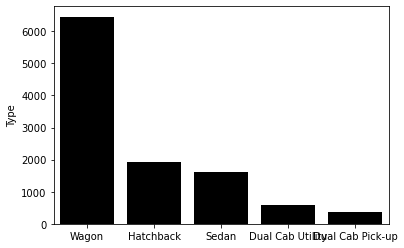

In [35]:
sns.barplot(x=car['Type'].value_counts().head().index, y=car['Type'].value_counts().head(), color='black')
print(car['Type'].value_counts().head())

### 12. Car Fuel Distribution

Unleaded Petrol              5606
Diesel                       5038
Premium Unleaded Petrol      2633
Unleaded Petrol/Electric      244
Premium Unleaded/Electric      90
Name: Fuel, dtype: int64


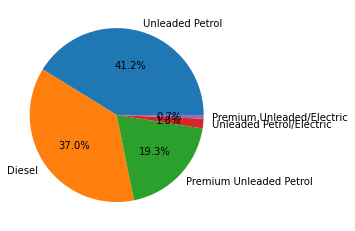

In [36]:
plt.pie(car['Fuel'].value_counts().head(), labels=car['Fuel'].value_counts().head().index, autopct='%1.1f%%')
print(car['Fuel'].value_counts().head())

### 13. Car Gearbox Distribution

Automatic    87.40%
Manual       12.55%
Front         0.04%
AWD           0.01%
Name: Gearbox, dtype: object


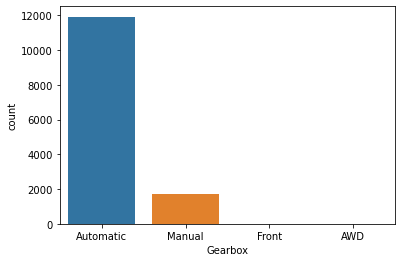

In [37]:
sns.countplot(x=car['Gearbox'])
print(f"{car['Gearbox'].value_counts(normalize=True).map('{:.2%}'.format)}")

### 14. Car Status Distribution

 Used            96.17%
 New In Stock     2.00%
 Demo             1.83%
Name: Status, dtype: object


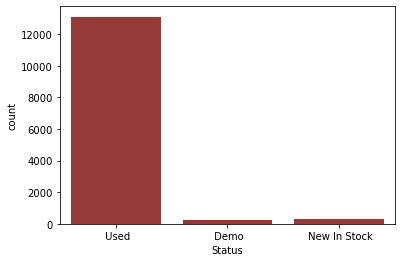

In [38]:
sns.countplot(x=car['Status'], color='brown')
print(f"{car['Status'].value_counts(normalize=True).map('{:.2%}'.format)}")


### Key Observation:

The overwhelming majority (96.17%) of cars in the dataset are categorized as "Used." This suggests that the dataset primarily focuses on the used car market.

> Implications for Data Modeling:

1. Model Focus: Given the predominance of used cars, models should be tailored to predict or analyze factors related to used cars.
2. Feature Engineering: Feature engineering can focus on attributes specific to used cars, such as pricing, brand, model, year, or kilometers.
3. Data Preparation: A new dataset would be created to focus on used cars only.
4. Model Selection: Multiple Linear Regression
5. Evaluation Metrics: Mean Absolute Error

# Create a predictive model for Used Cars, using Car Brand, model, year and kilometers as the features, and Price as the target variable.

<a id='Split Data'></a>
## Split Data to Feature and Target

In [39]:
#Create a new dataframe for used cars
car = car[car['Status']== ' Used']
car.head(1)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4


In [40]:
#split data
feature = ["Brand","Model","Year","Kilometers"]
target = 'Price'
X_train = car[feature]
y_train = car[target]
print(X_train.shape)
print(y_train.shape)

(13115, 4)
(13115,)


<a id='Baseline'></a>
## Baseline

In [41]:
# Baseline
from sklearn.metrics import mean_absolute_error
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train) #Where y_mean is the mean of y_train
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Price:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Price: 31938.76
Baseline MAE: 11324.44


#Model Building
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_training = model.predict(X_train)
y_pred_training[:5]

<a id='Build Model'></a>
## Build Model

In [42]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Brand', 'Model'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [43]:
# Check your work
check_is_fitted(model[-1])

<a id='iterate'></a>
## Iteration

In [44]:
y_pred_training =model.predict(X_train)

print("Training MAE:",  mean_absolute_error(y_train,y_pred_training))

Training MAE: 4701.321236398341


<a id='Evaluate'></a>
## Evaluation

In [45]:
def make_prediction(Brand,Model,Year,Kilometers):
    data = {
        "Brand": Brand,
        "Model": Model,
        "Year": Year,
        "Kilometers": Kilometers
    }
    car= pd.DataFrame(data, index=[0])
    prediction = model.predict(car).round(2)[0]
    return f"Predicted car price: ${prediction}"


In [46]:
make_prediction("Jeep","Cherokee",2015, 114344)

'Predicted car price: $24123.38'

In [47]:
#Dashboard for car price
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
interact(
    make_prediction,
    Year=IntSlider(
        min=X_train["Year"].min(),
        max=X_train["Year"].max(),
        value=X_train["Year"].mean(),
    ),
    Kilometers=IntSlider(
        min=X_train["Kilometers"].min(),
        max=X_train["Kilometers"].max(),
        value=X_train["Kilometers"].mean(),
    ),
    Brand=Dropdown(options=sorted(X_train["Brand"].unique())),
    Model=Dropdown(options=sorted(X_train["Model"].unique()))
);

interactive(children=(Dropdown(description='Brand', options=('Abarth', 'Alfa Romeo', 'Audi', 'BMW', 'Chery', '…

In [48]:
# Assuming you have a trained model named 'model'
with open('my_model.pkl', 'wb') as f:
    pickle.dump(model, f)

<a id='Conclusions'></a>
## Conclusions

### Analysis and Model Training Conclusions
>Key Findings from Exploratory Data Analysis (EDA):

1. Car Brand Diversity: Volkswagen leads in the number of variants, while Mercedes-Benz offers the most models.
2. Engine Capacity: Jeep boasts the strongest engine capacity, but engine capacity and price exhibit a weak correlation.
3. Price Factors: Status, model, and car series significantly influence price. New models are more expensive.
4. Color Preference: White is the most popular car color, followed by grey and silver.
5. Car Types: Wagons, hatchbacks, and sedans dominate the market.
6. Fuel Types: Unleaded petrol is the most common fuel type, followed by diesel.
7. Gearboxes: Automatic gearboxes are overwhelmingly preferred.
8. Model Training and Implications:

The predictive model for used car prices, using Car Brand, model, year, and kilometers as features, demonstrates the potential to accurately estimate car values based on these factors.

>Key Insights and Recommendations:

1. Model Relevance: The chosen features align with common factors influencing used car prices.
2. Feature Engineering: Consider exploring additional features, such as condition, maintenance history, or specific equipment, to enhance model accuracy.
3. Model Evaluation: Thoroughly evaluate the model's performance using appropriate metrics (e.g., R-squared, mean squared error) and consider techniques like cross-validation to assess generalization.
4. Deployment: Once satisfied with the model's performance, deploy it in a production environment to make real-time predictions.
5. Continuous Monitoring: Monitor the model's performance over time and retrain it as needed to adapt to changing market conditions or data characteristics.
6. Further Analysis: Explore other factors that might influence car prices, such as location, seller reputation, or specific features.

Overall, the analysis and model training provide valuable insights into the used car market. By leveraging these findings, stakeholders can make informed decisions related to pricing, inventory management, and marketing strategies.